<a href="https://colab.research.google.com/github/vcoelh/ML/blob/main/handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
#%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

z é um vetor com outputs de um layer anterior

z = [[w1*x + b1], [w2*x + b2], ..., [wn * x + bn]]

a é um outro vetor mais agora com probabilidades 

In [65]:
def my_softmax(z):
  n = len(z)
  a = np.exp(z)
  sum = 0
  for i in range(n):
    sum += np.exp(z[i])
  for j in range(n):
    a[j] = np.exp(z[j])/ sum
  
  return a


In [66]:
test_my_softmax(my_softmax)

 All tests passed.


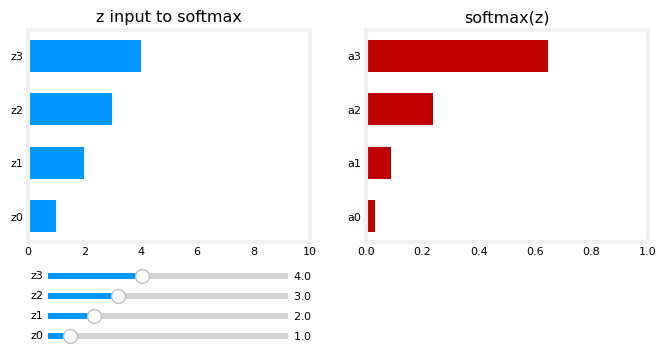

In [67]:
plt.close("all")
plt_softmax(my_softmax)

In [68]:
X = np.load("X.npy")
y = np.load("y.npy")

print(f'X.shape: {X.shape}, y.shape{y.shape}')
print(f' primeiro elemento  X: {X[0:2]}, y: {y[1,0]}')

X.shape: (5000, 400), y.shape(5000, 1)
 primeiro elemento  X: [[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
  -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
   3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
   0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  

visualizando o dataset

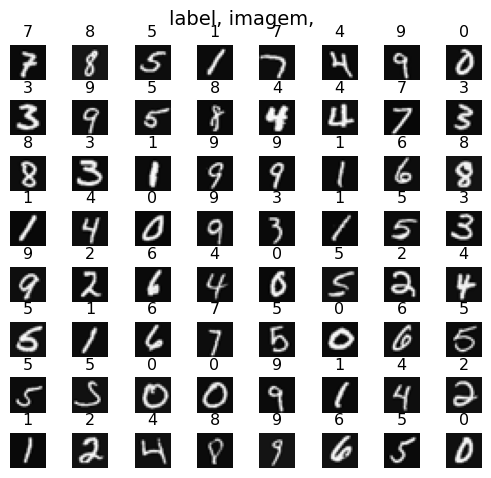

In [69]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

m ,n = X.shape

##dimensões das imagens
fig, axes = plt.subplots(8, 8, figsize = (5, 5))
fig.tight_layout(pad = 0.13, rect = [0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
  ## selecionando um index aleatório
  random_index = np.random.randint(m)

  X_random_reshaped = X[random_index].reshape((20,20)).T

  ## mostrando as imagens
  ax.imshow(X_random_reshaped, cmap = 'gray')


  ## mostrando o label
  ax.set_title(y[random_index,0])
  ax.set_axis_off()
  fig.suptitle("label, imagem,", fontsize = 14)

In [70]:
tf.random.set_seed(1234)
model = Sequential(
    [
     tf.keras.Input(shape=(400,)),
     tf.keras.layers.Dense(units = 25, activation = 'relu', name = 'L1'),
     tf.keras.layers.Dense(units = 15, activation = 'relu', name = 'L2'),
     tf.keras.layers.Dense(units = 10, activation = 'linear', name = 'L3')   
    ], name = 'my_model'
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), ### diz para o tensorflow q softmax vai ser aplicada quando for calcular o loss
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(
    X,y, epochs = 150
)

Epoch 1/150
157/157 [==============================] - 1s 1ms/step - loss: 1.5750
Epoch 2/150
157/157 [==============================] - 0s 1ms/step - loss: 0.6058
Epoch 3/150
157/157 [==============================] - 0s 1ms/step - loss: 0.4160
Epoch 4/150
157/157 [==============================] - 0s 1ms/step - loss: 0.3452
Epoch 5/150
157/157 [==============================] - 0s 1ms/step - loss: 0.3069
Epoch 6/150
157/157 [==============================] - 0s 2ms/step - loss: 0.2772
Epoch 7/150
157/157 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 8/150
157/157 [==============================] - 0s 2ms/step - loss: 0.2301
Epoch 9/150
157/157 [==============================] - 0s 2ms/step - loss: 0.2187
Epoch 10/150
157/157 [==============================] - 0s 2ms/step - loss: 0.1963
Epoch 11/150
157/157 [==============================] - 0s 2ms/step - loss: 0.1852
Epoch 12/150
157/157 [==============================] - 0s 2ms/step - loss: 0.1739
Epoch 13/150


In [71]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [72]:
[layer1, layer2, layer3] = model.layers

In [73]:
w1, b1 = layer1.get_weights()
w2, b2 = layer2.get_weights()
w3, b3 = layer3.get_weights()

print(f' w1: {w1.shape}, b1: {b1.shape}\n')
print(f' w2: {w2.shape}, b2: {b2.shape}\n')
print(f' w3: {w3.shape}, b3: {b3.shape}\n')

 w1: (400, 25), b1: (25,)

 w2: (25, 15), b2: (15,)

 w3: (15, 10), b3: (10,)



testar uma previsão

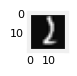

2


In [74]:
image_2 = X[1015]
display_digit(image_2)
#ax.set_axis_off()
print(y[1015,0])

In [75]:
prediction = model.predict(image_2.reshape(1,400))
print(f'prediction: {prediction}, largest value: {np.argmax(prediction)}')


1/1 [==============================] - 0s 44ms/step
prediction: [[-19.     3.03  14.93   2.99 -36.61 -15.8  -14.63  -1.04 -11.55 -23.66]], largest value: 2


In [76]:
prediction_p = tf.nn.softmax(prediction)
print(f'probabilidade de ser um 2 : {prediction_p}')
print(f'total de previsões : {np.sum(prediction_p)}') ## tem que dar 1

probabilidade de ser um 2 : [[1.83e-15 6.77e-06 1.00e+00 6.51e-06 4.11e-23 4.53e-14 1.45e-13 1.16e-07
  3.16e-12 1.73e-17]]
total de previsões : 1.0


In [77]:
yhat = np.argmax(prediction_p)
print(f"previsão: {yhat}")

previsão: 2


funciona!  Agora vamos aplicar a mais imagens !

1/1 [==============================] - 0s 22ms/step


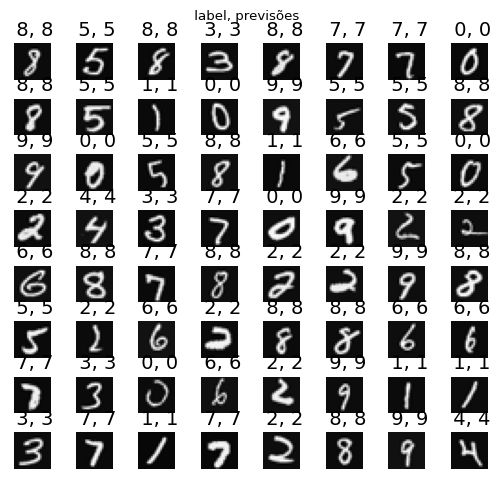

In [78]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

m,n = X.shape



fig, axes = plt.subplots(8,8, figsize = (5,5))
fig.tight_layout(pad = 0.013, rect = [0, 0.03, 1, 0.92])
widgvis(fig)

for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m)

  X_random_reshaped = X[random_index].reshape((20,20)).T

  ## mostrando a imagem
  ax.imshow(X_random_reshaped, cmap = 'gray')

  ## previsão
  prediction = model.predict(X[random_index].reshape(1,400))
  prediction_p = tf.nn.softmax(prediction)
  yhat = np.argmax(prediction_p)

  ## mostrando a previsão e a resposta
  ax.set_title(f' {y[random_index,0]}, {yhat}', fontsize = 14)
  ax.set_axis_off()
fig.suptitle(f' label, previsões ')
plt.show()


In [79]:
print(f'previsões erradas : {display_errors(model, X, y)} de {len(X)} imagens')

157/157 [==============================] - 0s 1ms/step
no errors found
previsões erradas : 0 de 5000 imagens


woohoo  ;). bixinho ta voando, tmlc